### Introduction

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

Data is from:https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future. The dataset has the following features:

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart_disease_prediction.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### EDA: Descriptive Statistics

Given the list of features and looking at some of the rows from the dataset on the previous screen, we see that we have both categorical and numerical features.

In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Based on the previous few screens we see the following:

- The average age of patients is about 53 years.
- The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
- RestingBP and Cholesterol have a minimum value of zero
- There don't seem to be any missing values in these columns.

A couple of observations stand out. RestingBP is the resting blood pressure, and it's unlikely to be zero. But what about Cholesterol? Low cholesterol certainly sounds like a good thing, but can it be zero?

This is where domain expertise can help us. Since we might not be suited to answer the question, we could to reach out to a subject matter expert or research it on our own.

As per the dataset description, Cholesterol contains the serum cholesterol values. And per the American Heart Association, serum cholesterol:

"is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level."

The above information is enough to let us know that a 0 value for serum cholesterol is unlikely.
So how do these insights help us with our prediction model? We'll come back to this later. For now, we'll continue exploring our dataset.

Our observations so far were only for a subset of the columns. Additionally, we don't know how the dataset is distributed in relation to our target variable -- HeartDisease. For example, how many patients had a resting ECG categorized as ST? How many female patients had heart disease?

We'll explore the categorical features next, but we'll rely on creating visualizations to understand how the data is distributed.

In [8]:
df2 = df.select_dtypes(include=['object'])
df2

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [9]:
heart_fasting=df2.copy()
heart_fasting['HeartDisease']= df['HeartDisease']
heart_fasting['FastingBS']= df['FastingBS']
heart_fasting

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,FastingBS
0,M,ATA,Normal,N,Up,0,0
1,F,NAP,Normal,N,Flat,1,0
2,M,ATA,ST,N,Up,0,0
3,F,ASY,Normal,Y,Flat,1,0
4,M,NAP,Normal,N,Up,0,0
...,...,...,...,...,...,...,...
913,M,TA,Normal,N,Flat,1,0
914,M,ASY,Normal,N,Flat,1,1
915,M,ASY,Normal,Y,Flat,1,0
916,F,ATA,LVH,N,Flat,1,0


[Text(0, 0, '410'), Text(0, 0, '508')]

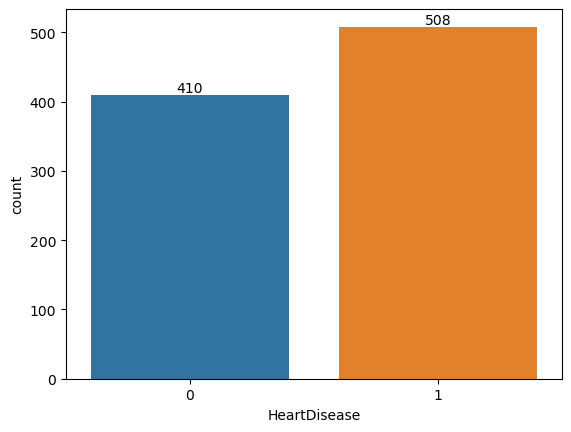

In [10]:
disease = sns.countplot(x='HeartDisease', data=df)
#code below shows us the value that the graph returns
disease.bar_label(disease.containers[0])

[Text(0, 0, '725'), Text(0, 0, '193')]

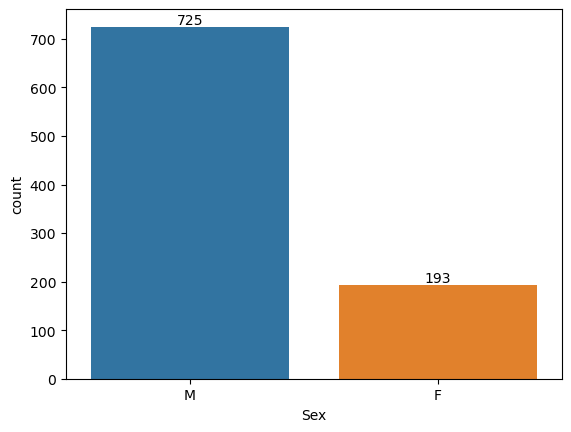

In [11]:
sex = sns.countplot(x='Sex', data=df)
sex.bar_label(sex.containers[0])

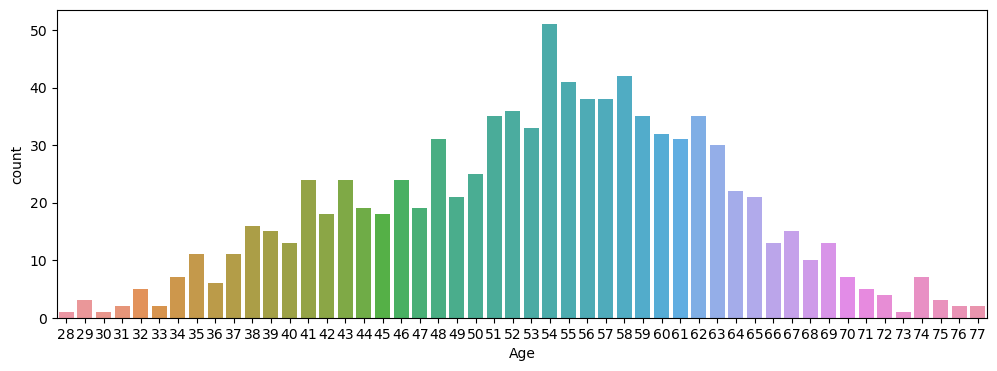

In [12]:
plt.figure(figsize=(12,4))
age = sns.countplot(x='Age', data=df)


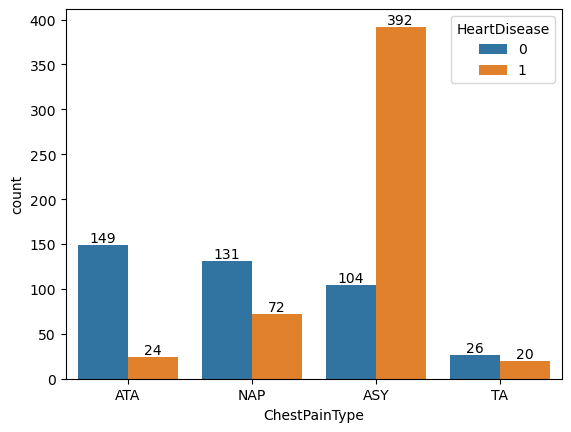

In [13]:
asy = sns.countplot(x='ChestPainType', data=df,hue='HeartDisease')
#in this case we need a for loop to return both of the values that the graph returns
for container in asy.containers:
    asy.bar_label(container)

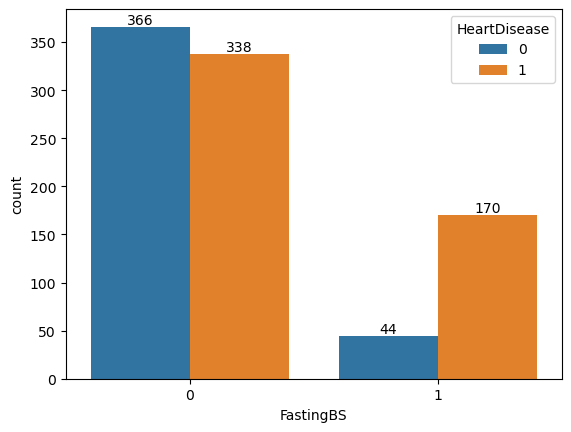

In [14]:
blood = sns.countplot(x='FastingBS', data=df,hue='HeartDisease')
#in this case we need a for loop to return both of the values that the graph returns
for container in blood.containers:
    blood.bar_label(container)

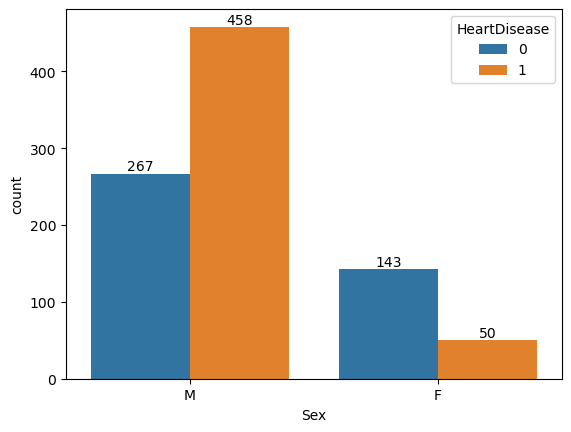

In [15]:
sex = sns.countplot(x='Sex', data=df,hue='HeartDisease')
#in this case we need a for loop to return both of the values that the graph returns
for container in sex.containers:
    sex.bar_label(container)

### Data Cleaning


In the previous few lines, we calculated the number of missing values in our entire dataset and didn't find any. We also plotted our categorical columns and observed a few details:

- The dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.
- 410 patients were not diagnosed with heart disease, whereas 508 patients were. The target variable is somewhat evenly distributed, which is beneficial for training our model.
- A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, it's should be noted that asymptomatic implies that those patients who had heart disease did not have chest pain as a symptom.
- A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not.

 There are a lot of similar patterns that we can observe when we start grouping our data. These patterns can help us narrow down the features we want for training our model.

Before we move on to that, let's clean up the data. We identified that there are no missing values. However, as we noticed earlier, a couple of columns have 0 values that don't make sense.

There are a few ways we can handle these values:

- We could remove those rows entirely if their frequency of occurrence is low.
- We could impute those zeros with the median value of that column or the median value of the column grouped by HeartDisease.
- We could try some complex approaches. For example, instead of using the median of the entire column, maybe we could look at the median of the values grouped by the age, sex, and/or resting ECG of the patient. The resting blood pressure of a female in her 30s with a normal ECG might be lower than what we would get from the median of the entire column.

The third option might give us a slightly more accurate result, but given the small size of our dataset, we can ignore it for now. We'll identify how many of these values exist in our dataset and approach accordingly.

In [16]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Based on the above value we can remove this as we would only be removing one row from the data which would not affect the overall performance of the model

In [17]:
df = df.drop(df[df['RestingBP']==0].index)
#confirming is it dropped the row
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [18]:
cl=df[df['Cholesterol']==0]
cl['HeartDisease']

293    1
294    1
295    1
296    1
297    1
      ..
514    1
515    0
518    1
535    1
536    1
Name: HeartDisease, Length: 171, dtype: int64

In [19]:
171/918

0.18627450980392157

For Cholesterol we can see that we have 171 rows that have a Cholesterol value of 0. If we deleted this then we would be deleting about 18% of the data which is quite a large amount of data beingn lost. So in this case we will replace those values with the median value of the corresponding column and the corresponding HeartDisease value.

Before we replace those values we are going to do small change to the data so that when we want to replace all the corresponding HeartDisease where the patient has a cholesterol of zero.

Once we changed the values we can see all the pateints that have a cholesterol of zero and we see that there heart diease will be 99999. The reason why we had to do this is because have a cholesterol of zero does not give information if the patient has a heart disease or not.



In [20]:
df['HeartDisease'] = np.where(df['Cholesterol']==0, 99999, df['HeartDisease'])
df['HeartDisease'].value_counts()

0        390
1        356
99999    171
Name: HeartDisease, dtype: int64

In [21]:
df['Cholesterol']=df['Cholesterol'].replace(0,df['Cholesterol'].median())
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Now that we have replaced all the cholesterol of zero to the median we now need to do that for all the values for heartdisease (ie the values that values that we changed to 99999) and replace them with the median in that column

In [22]:
df['HeartDisease']=df['HeartDisease'].replace(99999,df['HeartDisease'].median())
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [23]:
#checking if it gotten repalced
df['HeartDisease'].value_counts()

1    527
0    390
Name: HeartDisease, dtype: int64

## Feature Selection

Now that we've cleaned our data, we can select features for our model. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

- Age
- Sex
- ChestPainType
- Cholesterol
- FastingBS

In [24]:
#converting the categorical varibles into dummy variables 

pd.get_dummies(df2)

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [25]:
#combining the dataframes
df = pd.concat([df,pd.get_dummies(df2)],axis=1)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,68.0,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,...,0,0,0,1,0,1,0,0,1,0
915,57.0,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,...,0,0,0,1,0,0,1,0,1,0
916,57.0,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,...,0,0,1,0,0,1,0,0,1,0
917,38.0,M,NAP,138.0,175.0,0.0,Normal,173.0,N,0.0,...,1,0,0,1,0,1,0,0,0,1


In [26]:
#dropping the orginal columns ie the ones that we had made into dummy varaibles

df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,68.0,144.0,193.0,1.0,141.0,3.4,1.0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57.0,130.0,131.0,0.0,115.0,1.2,1.0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57.0,130.0,236.0,0.0,174.0,0.0,1.0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
917,38.0,138.0,175.0,0.0,173.0,0.0,0.0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


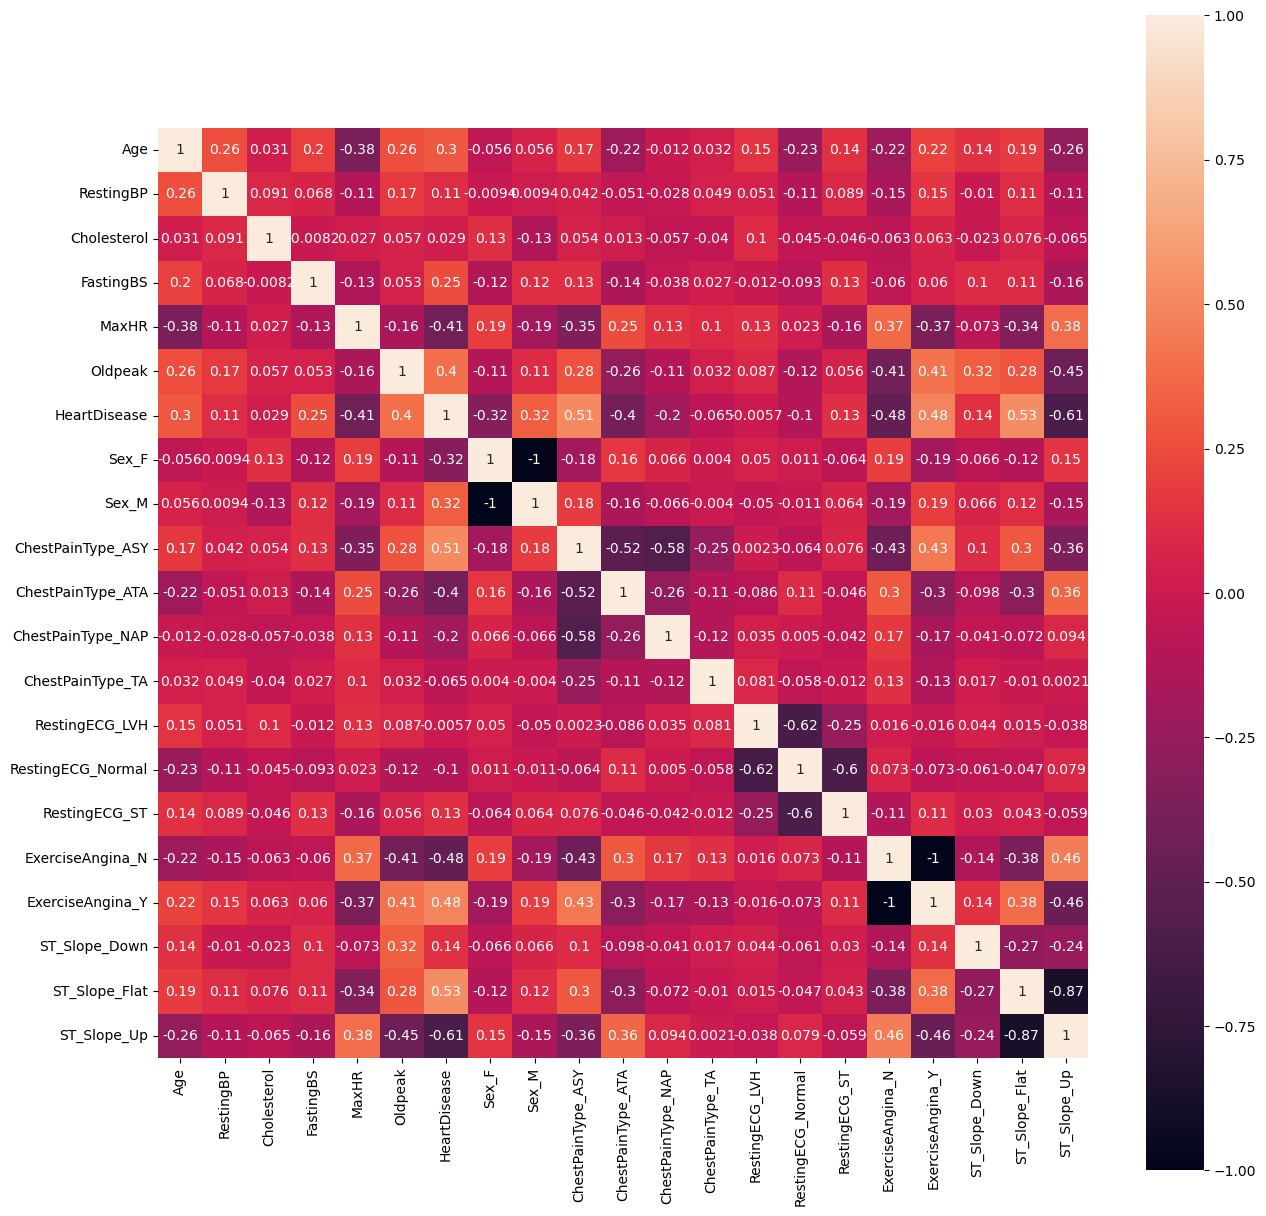

In [27]:
# checking the Correlation of the variables

#Correlation map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,square=True) 
plt.show()

In [28]:
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease         1.000000
ST_Slope_Flat        0.530326
ChestPainType_ASY    0.508808
ExerciseAngina_Y     0.484409
Oldpeak              0.397585
Sex_M                0.324216
Age                  0.304382
FastingBS            0.250390
ST_Slope_Down        0.137728
RestingECG_ST        0.132193
RestingBP            0.113655
Cholesterol          0.029190
RestingECG_LVH      -0.005702
ChestPainType_TA    -0.065039
RestingECG_Normal   -0.102064
ChestPainType_NAP   -0.197403
Sex_F               -0.324216
ChestPainType_ATA   -0.402681
MaxHR               -0.414676
ExerciseAngina_N    -0.484409
ST_Slope_Up         -0.605840
Name: HeartDisease, dtype: float64

From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:

- Oldpeak
 -- We could also select MaxHR or ChestPainType_ATA.
- Sex_M
 --It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account.
- ExerciseAngina_Y
- ST_Slope_Flat
- ST_Slope_Up

The correlation coefficient threshold was chosen based on what made sense when looking at the heat map. We encourage you to experiment with the threshold and select features accordingly.

Surprisingly, Cholesterol is not strongly correlated to HeartDisease. We can consider ignoring the feature for now.

Given everything we have attempted so far, we can narrow down the features that might be relevant. We recommend you identify those features yourself before moving forward.

Next, we will create and train multiple models using one of those features at a time.

## Building a Classifier I



In [29]:
df=df.dropna()
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110.0,264.0,0.0,132.0,1.2,1.0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68.0,144.0,193.0,1.0,141.0,3.4,1.0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57.0,130.0,131.0,0.0,115.0,1.2,1.0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57.0,130.0,236.0,0.0,174.0,0.0,1.0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [30]:
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
# a list that contains our selected features as string
cols=['Oldpeak','Sex_M','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']

In the following code we are going to do the following:


- Iterate over the list. For every iteration:
- Create a k-NN classifier.
- Set a value for the number of neighbors.
- Fit the model to the training data one feature at a time.
- Evaluate the model on the validation set.
- Print the accuracy of the model.

In [33]:
for i in cols:
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train[[i]],y_train)
    pred=knn.predict(X_test[[i]])
    print('The accuracy score for {i} is {acc}'.format(i = i, acc = accuracy_score(y_test, pred)))


The accuracy score for Oldpeak is 0.7065217391304348
The accuracy score for Sex_M is 0.5706521739130435
The accuracy score for ExerciseAngina_Y is 0.5706521739130435
The accuracy score for ST_Slope_Flat is 0.8152173913043478
The accuracy score for ST_Slope_Up is 0.5706521739130435


We got the highest accuracy with ST_Slope_Flat as our feature. But what if we trained a model on all of these features together?

Let's try that next!

Before we do, it's important to note that our features are not yet normalized. Not all of the values are within the same range. We will first scale our data to the range (0, 1) before training our model. Note: We will only scale our selected features.

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
pred= model.predict(X_test)
accuracy_score(y_test, pred)

0.8206521739130435

## Hyperparameter Tuning

Our previous model using all of our selected and normalized features got an accuracy of ~82%! That's not a strong improvement on the model trained on just the ST_Slope_Flat feature, but it's a good start.

Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use GridSearchCV to search over those values.

GridSearchCV, as we know, allows us to search over all the parameters for our classifier in scikit-learn. For example, for the KNeighborsClassifier we can choose to experiment with the following:

- n_neighbors,
- weights,
- metric and more.


Additionally, since GridSearchCV creates a validation set as part of its process, we'll have to update our workflow a bit.

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis=1))
scaled_features = scaler.transform(df.drop('HeartDisease',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat
0,-1.432206,0.414627,0.896615,-0.551733,1.383339,-0.831502,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.22981,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573
1,-0.478057,1.526360,-1.122657,-0.551733,0.754736,0.106251,1.936826,-1.936826,-1.085425,-0.482210,1.881384,-0.22981,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888
2,-1.750256,-0.141240,0.785462,-0.551733,-1.523953,-0.831502,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.22981,-0.507826,-1.226974,2.037569,0.824310,-0.824310,-0.271607,-1.001091,1.149573
3,-0.584074,0.303453,-0.492793,-0.551733,-1.131075,0.575128,1.936826,-1.936826,0.921298,-0.482210,-0.531524,-0.22981,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888
4,0.052026,0.970493,-0.844776,-0.551733,-0.581047,-0.831502,-0.516309,0.516309,-1.085425,-0.482210,1.881384,-0.22981,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573


In [36]:
#X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_features,df['HeartDisease'],
                                                    test_size=0.30)

IndentationError: unexpected indent (980366851.py, line 2)

In [39]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [40]:
knn_grid.best_score_*100, knn_grid.best_params_

(85.94725561457459, {'metric': 'manhattan', 'n_neighbors': 19})

In [42]:
X_test_scaled = scaler.transform(X_test)
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 87.50


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Our model got an accuracy of ~87%. That's really good! This means that our model is likely to correctly predict whether a patient is at risk for a heart disease ~87% of the time.

However, the accuracy being higher than the one before raises some flags.

One explanation that could explain is to look at how the data is distributed.

In [46]:
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
1    724
0    193
Name: Sex_M, dtype: int64

Distribution of patients by their sex in the training dataset


AttributeError: 'numpy.ndarray' object has no attribute 'Sex_M'

In [ ]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'